In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('../data/student_data.csv')

In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


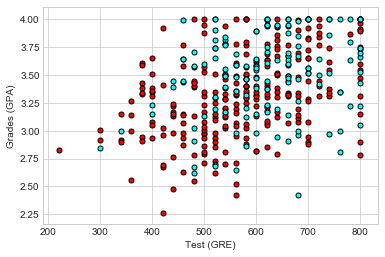

In [4]:
# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

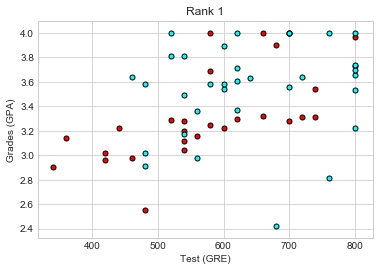

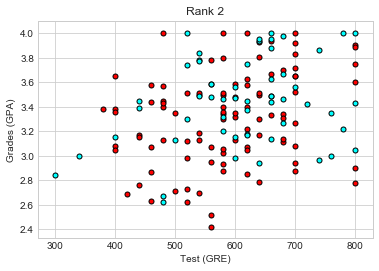

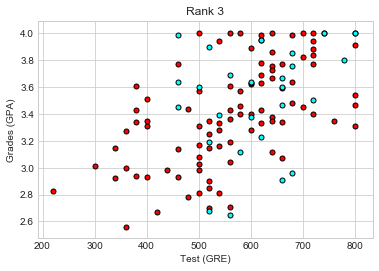

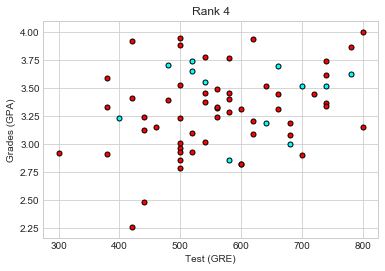

In [5]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

To use rank as a classifier, we will need to one-hot encode it.

In [7]:
dummies = pd.get_dummies(data['rank'])
dummies.head()

,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [8]:
data = pd.concat([data, dummies], axis=1)
data = data.drop('rank', axis=1)
data

,admit,gre,gpa,1,2,3,4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
...,...,...,...,...,...,...,...
395,0,620,4.00,0,1,0,0
396,0,560,3.04,0,0,1,0
397,0,460,2.63,0,1,0,0
398,0,700,3.65,0,1,0,0


now we need to scale the gre and gpa so they are useful (put from 0 to 1)

In [9]:
data['gre'] = data['gre']/800
data['gpa'] = data['gpa']/4
data.head()

,admit,gre,gpa,1,2,3,4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


Now lets take split the data in testing and training

In [10]:
percent_train = 0.9

sample = np.random.choice(data.index, size=int(len(data)*percent_train), replace=False)
train_data, test_data = data.iloc[sample], data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data.head())
print(test_data.head())

Number of training samples is 360
Number of testing samples is 40
     admit    gre    gpa  1  2  3  4
292      0  0.850  0.925  0  1  0  0
248      0  0.850  0.910  0  0  1  0
157      1  0.600  0.895  1  0  0  0
203      0  0.525  0.980  0  0  0  1
164      0  0.725  0.825  0  1  0  0
    admit    gre     gpa  1  2  3  4
1       1  0.825  0.9175  0  0  1  0
24      1  0.950  0.8375  0  1  0  0
27      1  0.650  0.9350  0  0  0  1
30      0  0.675  0.9450  0  0  0  1
33      1  1.000  1.0000  0  0  1  0


Next we must split between features (X or x's) and the label (outcome we are trying to predict)

In [11]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features.head())
print(targets.head())

       gre    gpa  1  2  3  4
292  0.850  0.925  0  1  0  0
248  0.850  0.910  0  0  1  0
157  0.600  0.895  1  0  0  0
203  0.525  0.980  0  0  0  1
164  0.725  0.825  0  1  0  0
292    0
248    0
157    1
203    0
164    0
Name: admit, dtype: int64


Now we train the model. 

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def ce(y, prediction):
    return - y*np.log(prediction) - (1 - y) * np.log(1-prediction)
def error_term_formula(x, y, output):
    return (y - output) * sigmoid_prime(x)

In [13]:
epochs = 100
learnrate = 0.5

array([ 0.26952916, -0.29807985])

In [14]:
def train_nn(features, targets, epochs, learnrate):
    
    np.random.seed(2)

    n_records, n_features = features.shape
    last_loss = None

    # start at a random weight vector
    # create a randome set of weights with size equal to the features, one for each input
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        # create a weight vector that is empty
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = ce(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.24946860040623053
Epoch: 10
Train loss:  0.23920291375068833
Epoch: 20
Train loss:  0.23295653918213707
Epoch: 30
Train loss:  0.22886971821693639
Epoch: 40
Train loss:  0.2259579785879706
Epoch: 50
Train loss:  0.2237067968639924
Epoch: 60
Train loss:  0.22184617644465046
Epoch: 70
Train loss:  0.22023271630575172
Epoch: 80
Train loss:  0.21878895943119872
Epoch: 90
Train loss:  0.21747212433122504
Finished training!


Let's test the weights we arrived at

In [67]:
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.650
